In [ ]:
#used LSTM to predict stock price.
#I'm still new to ML, it's my first LSTM model following many tutorials and guides online.
import numpy as np
import pandas as pd
#used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
#libraries for LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
start = datetime(2010, 1, 1)
end = datetime(2019,12,28)
ticker = 'SBIN.NS'
data = web.DataReader(ticker,'yahoo',start,end)
print(data)

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2010-01-04  230.000000  227.500000  ...  11031470.0   95.066895
2010-01-05  231.000000  228.009995  ...  11613740.0   95.102180
2010-01-06  231.500000  228.500000  ...  14527930.0   95.672699
2010-01-07  231.000000  228.110001  ...   8576510.0   95.137444
2010-01-08  230.389999  228.009995  ...  10453820.0   94.853218
...                ...         ...  ...         ...         ...
2019-12-20  339.500000  330.350006  ...  51839714.0  337.850006
2019-12-23  338.850006  330.350006  ...  30150335.0  332.399994
2019-12-24  334.200012  329.200012  ...  21747782.0  331.450012
2019-12-26  333.450012  328.100006  ...  24616942.0  329.850006
2019-12-27  338.350006  333.000000  ...  33477173.0  337.250000

[2459 rows x 6 columns]


In [ ]:
data.info() #check data type for all is float.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2010-01-04 to 2019-12-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2459 non-null   float64
 1   Low        2459 non-null   float64
 2   Open       2459 non-null   float64
 3   Close      2459 non-null   float64
 4   Volume     2459 non-null   float64
 5   Adj Close  2459 non-null   float64
dtypes: float64(6)
memory usage: 134.5 KB


<Figure size 432x288 with 0 Axes>

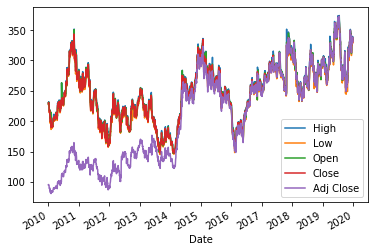

In [ ]:
plt.figure()
data_copy = data.copy()
del data_copy['Volume']
data_copy.plot()
plt.show()

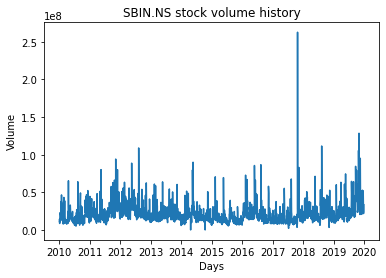

In [ ]:
plt.figure()
plt.plot(data["Volume"])
plt.title('{} stock volume history'.format(ticker))
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [ ]:
data.isna().any() #check for null values

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [ ]:
data_2=data.copy()
data_2 = data_2['Close']
print(data_2)
print(len(data_2))

Date
2010-01-04    229.119995
2010-01-05    229.205002
2010-01-06    230.580002
2010-01-07    229.289993
2010-01-08    228.604996
                 ...    
2019-12-20    337.850006
2019-12-23    332.399994
2019-12-24    331.450012
2019-12-26    329.850006
2019-12-27    337.250000
Name: Close, Length: 2459, dtype: float64
2459


In [ ]:
n_data = data_2.values.reshape(data_2.shape[0],1)
n_data

array([[229.11999512],
       [229.20500183],
       [230.58000183],
       ...,
       [331.45001221],
       [329.8500061 ],
       [337.25      ]])

In [ ]:
scl = MinMaxScaler(feature_range=(0,1))
n_data = scl.fit_transform(n_data)
n_data

array([[0.36331318],
       [0.36369092],
       [0.36980094],
       ...,
       [0.81803243],
       [0.81092255],
       [0.84380557]])

In [ ]:
look_back = 40
forward_days = 10
num_periods = 20

In [ ]:
division = len(n_data) - num_periods*forward_days
data_test = n_data[division-look_back:]
data_train = n_data[:division]

In [ ]:
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [ ]:
X_test,y_test = processData(data_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])
X,y = processData(data_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(1768, 40, 1)
(442, 40, 1)
(20, 40, 1)
(1768, 10)
(442, 10)
(20, 10)


In [ ]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (look_back,1)))
model.add(Dropout(0.4))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 50))
#model.add(Dropout(0.4))
#model.add(LSTM(units = 50))
#model.add(Dropout(0.4))
model.add(Dense(units=forward_days))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 40, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 51,310
Trainable params: 51,310
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_validate,y_validate),shuffle=True,batch_size=32)

Epoch 1/100
56/56 [==============================] - 1s 23ms/step - loss: 0.0366 - val_loss: 0.0077
Epoch 2/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 3/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0067 - val_loss: 0.0054
Epoch 4/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 5/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 6/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 7/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0055 - val_loss: 0.0066
Epoch 8/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 9/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 10/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 11

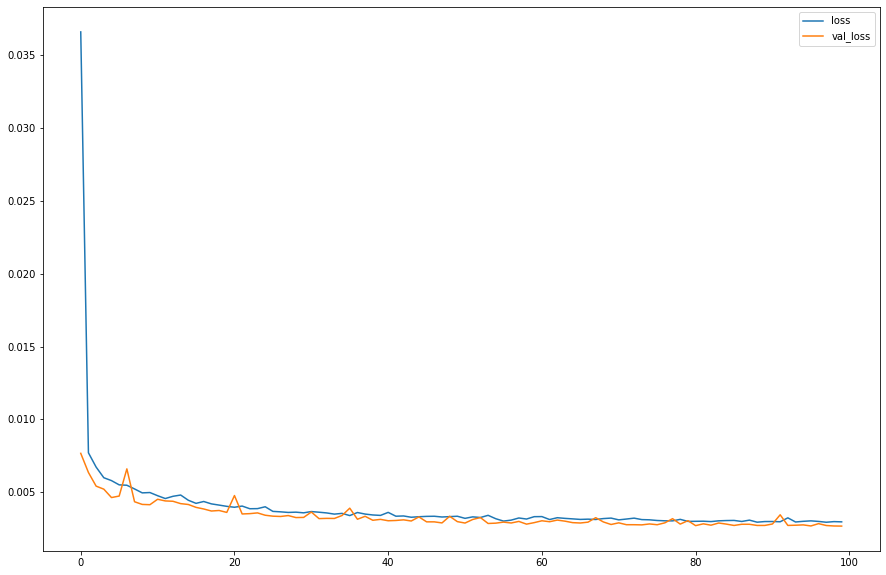

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

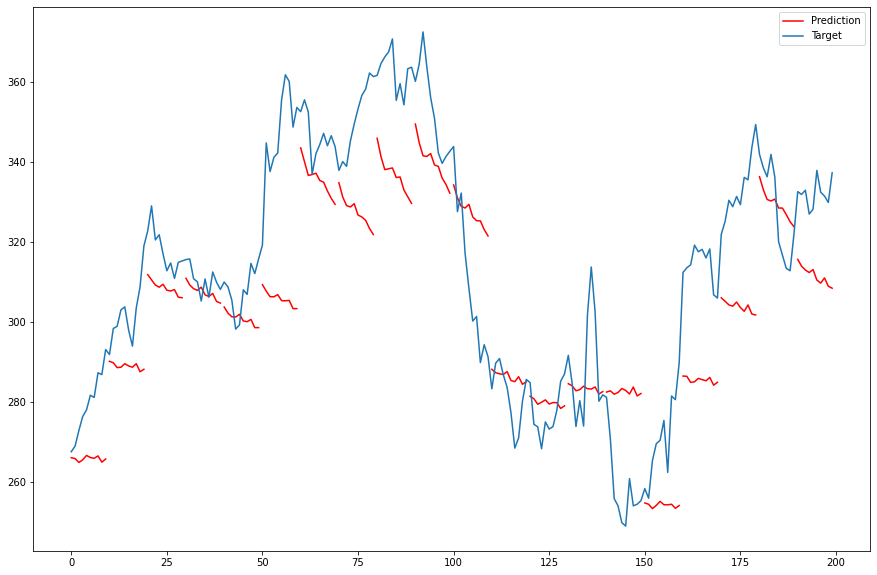

In [ ]:
Xt = model.predict(X_test)
plt.figure(figsize = (15,10))
for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')  
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

In [ ]:
#now combining and predicting all the data

In [ ]:
division = len(n_data) - num_periods*forward_days
leftover = division%forward_days+1
data_test = n_data[division-look_back:]
data_train = n_data[leftover:division]

In [ ]:
Xtrain,ytrain = processData(data_train,look_back,forward_days,forward_days)
Xtest,ytest = processData(data_test,look_back,forward_days,forward_days)

In [ ]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()
Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [ ]:
y = np.concatenate((ytrain, ytest), axis=0)

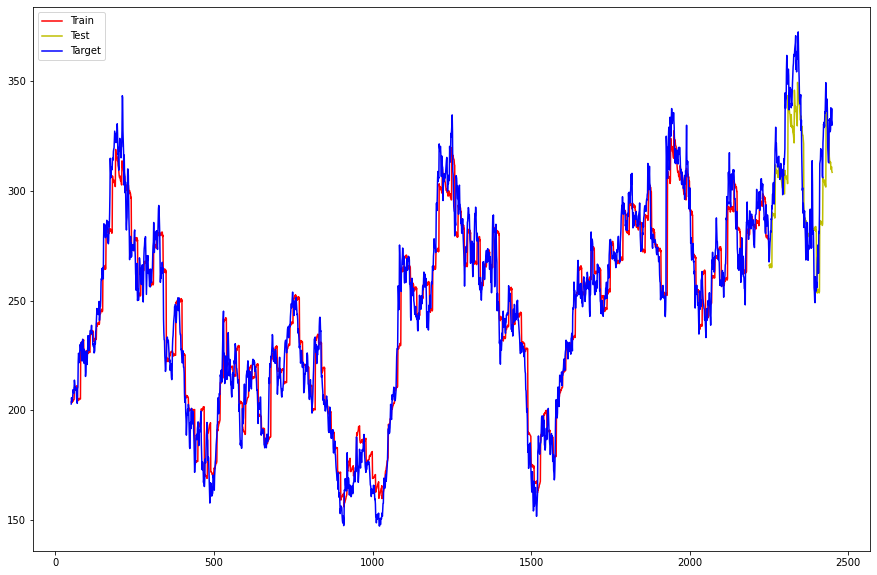

In [ ]:
plt.figure(figsize = (15,10))
# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')
# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='y', label='Test')
#Data used
plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')
plt.legend(loc='best')
plt.show()